In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [73]:
df = pd.read_csv('C:/Users/vipin.singh/Documents/timeSeries/.csv files/data1.csv')
df

,sold_0,sold_1,sold_2,sold_3,occur1,occur2,occur3,month
0,32.0,2.0,50.0,0.0,1.0,2.0,0.0,7
1,276.0,74.0,97.0,350.0,1.0,1.0,3.0,7
2,8.0,50.0,64.0,6.0,3.0,4.0,1.0,4
3,20.0,4.0,10.0,0.0,2.0,1.0,0.0,7
4,34.0,27.0,3.0,0.0,2.0,1.0,0.0,7
...,...,...,...,...,...,...,...,...
4928,137.0,109.0,3.0,0.0,4.0,1.0,0.0,5
4929,20.0,131.0,62.0,331.0,3.0,1.0,2.0,9
4930,52.0,23.0,7.0,0.0,1.0,1.0,0.0,5
4931,95.0,311.0,122.0,0.0,3.0,1.0,0.0,7


In [74]:
#(df['sold_3'] == 0). sum()

#step first convert into int all columns

In [75]:
#df.info()
#df['occur1'].unique()


In [76]:
#(df['occur3'] == 0). sum()

In [77]:
df1 = df.drop(columns=['sold_3', 'occur3'])
df1['sold_0']=df1['sold_0'].astype(int)
df1['sold_1']=df1['sold_1'].astype(int)
df1['sold_2']=df1['sold_2'].astype(int)

df1['occur1']=df1['occur1'].astype(int)
df1['occur2']=df1['occur2'].astype(int)
df1

,sold_0,sold_1,sold_2,occur1,occur2,month
0,32,2,50,1,2,7
1,276,74,97,1,1,7
2,8,50,64,3,4,4
3,20,4,10,2,1,7
4,34,27,3,2,1,7
...,...,...,...,...,...,...
4928,137,109,3,4,1,5
4929,20,131,62,3,1,9
4930,52,23,7,1,1,5
4931,95,311,122,3,1,7


In [78]:
df1.describe()

,sold_0,sold_1,sold_2,occur1,occur2,month
count,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000,4933.000000
mean,55.237786,69.318873,103.986013,1.647476,1.767484,6.588688
std,118.352164,165.275478,264.976399,0.981785,1.147859,1.872586
min,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,7.000000,10.000000,13.000000,1.000000,1.000000,5.000000
50%,20.000000,24.000000,36.000000,1.000000,1.000000,7.000000
75%,54.000000,64.000000,92.000000,2.000000,2.000000,8.000000
max,2201.000000,3923.000000,6058.000000,10.000000,12.000000,9.000000


In [79]:
df2 = df1.copy()
df2

,sold_0,sold_1,sold_2,occur1,occur2,month
0,32,2,50,1,2,7
1,276,74,97,1,1,7
2,8,50,64,3,4,4
3,20,4,10,2,1,7
4,34,27,3,2,1,7
...,...,...,...,...,...,...
4928,137,109,3,4,1,5
4929,20,131,62,3,1,9
4930,52,23,7,1,1,5
4931,95,311,122,3,1,7


In [80]:
df1.corr()

,sold_0,sold_1,sold_2,occur1,occur2,month
sold_0,1.000000,0.402576,0.381298,0.019937,0.048489,-0.036559
sold_1,0.402576,1.000000,0.394196,0.264556,0.048815,0.010836
sold_2,0.381298,0.394196,1.000000,0.048023,0.281475,0.049355
occur1,0.019937,0.264556,0.048023,1.000000,0.130198,-0.109323
occur2,0.048489,0.048815,0.281475,0.130198,1.000000,-0.080536
month,-0.036559,0.010836,0.049355,-0.109323,-0.080536,1.000000


In [83]:
df1 = df1[df1['sold_0']<3e2].reset_index(drop = True)
df1


,sold_0,sold_1,sold_2,occur1,occur2,month
0,32,2,50,1,2,7
1,276,74,97,1,1,7
2,8,50,64,3,4,4
3,20,4,10,2,1,7
4,34,27,3,2,1,7
...,...,...,...,...,...,...
4776,70,81,53,1,2,8
4777,137,109,3,4,1,5
4778,20,131,62,3,1,9
4779,52,23,7,1,1,5


In [139]:
#df1.isnull().sum()
#sns.displot(df1['sold_0'])
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sold_0  4781 non-null   int32
 1   sold_1  4781 non-null   int32
 2   sold_2  4781 non-null   int32
 3   occur1  4781 non-null   int32
 4   occur2  4781 non-null   int32
 5   month   4781 non-null   int64
dtypes: int32(5), int64(1)
memory usage: 130.9 KB


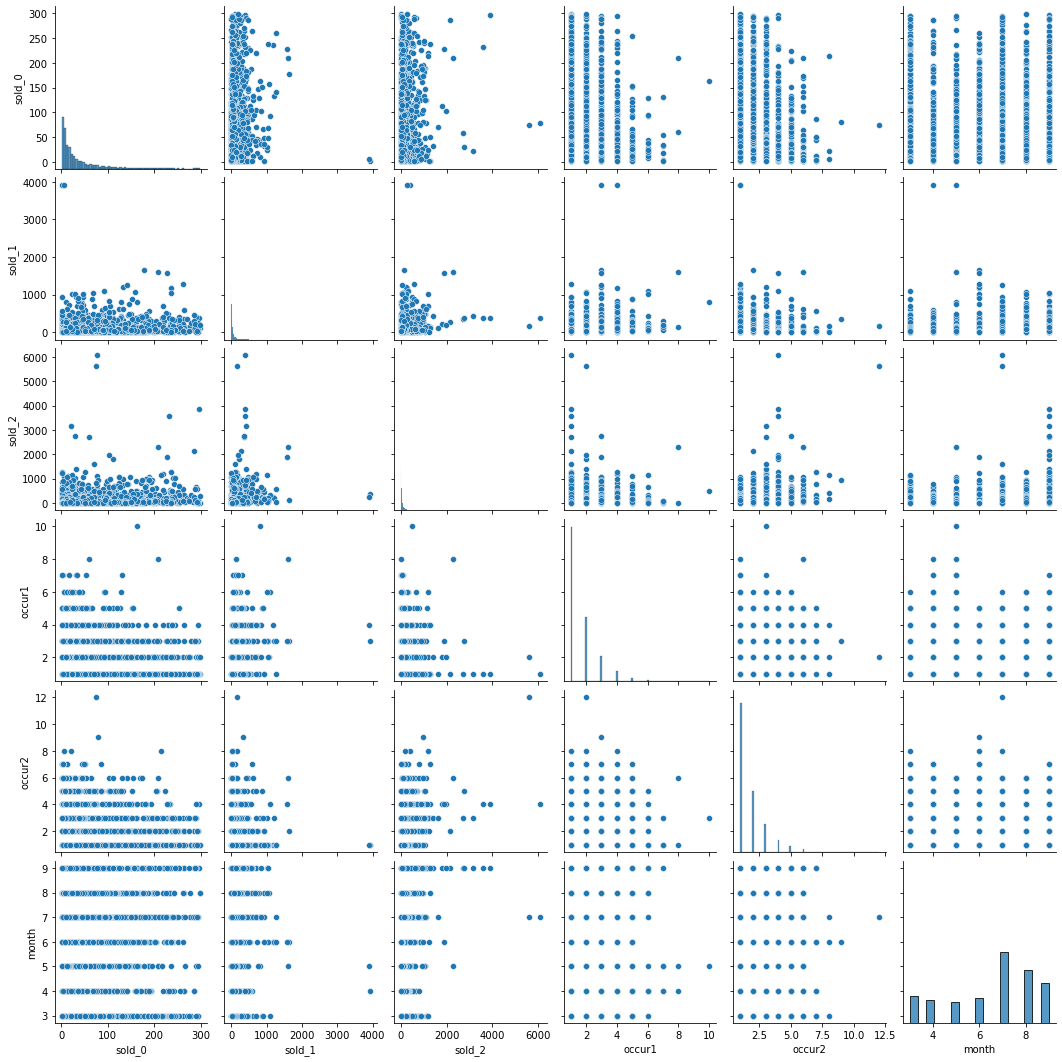

In [108]:
sns.pairplot(df1)

In [94]:
X = df1.drop(['sold_0'], axis = 1)
Y = df1[['sold_0']]

In [95]:
'''for i in X.columns:
    if( i  == 'month'):
       X[i]= np.power(X[i],3)
    else:
       X[i] = np.reciprocal(X[i])
X '''    


"for i in X.columns:\n    if( i  == 'month'):\n       X[i]= np.power(X[i],3)\n    else:\n       X[i] = np.reciprocal(X[i])\nX "

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)


In [136]:
# build a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
#print ("iNTERCEPT : ",linreg.intercept_)
#print ("CO-EFFICIENT : ",linreg.coef_)
y_pred=lr.predict(x_test)
y_pred=pd.DataFrame(y_pred)
y_pred.reset_index(drop = True)
#linreg.score(x_test,y_test)





,0
0,33.605884
1,43.617959
2,33.241281
3,29.684726
4,36.514465
...,...
1430,29.084099
1431,38.753130
1432,32.542930
1433,28.354162


In [138]:

y_test.reset_index(drop = True)


,sold_0
0,36
1,42
2,34
3,2
4,157
...,...
1430,6
1431,2
1432,11
1433,30


In [112]:
r2_score(y_test,y_pred)


0.1273988019416863

In [113]:
from sklearn.metrics import r2_score
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.1273988019416863


mean_absolute_error : 32.0838844384645


mean_squared_error :  2230.551888466349


root_mean_squared_error :  47.228718895036195


In [114]:
regressor = RandomForestRegressor(random_state = 42)

regressor.fit(x_train, y_train)
# make predictions
yhat = regressor.predict(x_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

In [120]:
regressor.score(x_train,y_train) 
x_test.shape

(1435, 5)

In [124]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(x_train, y_train)
y_pred3 = ridgereg.predict(x_test)


In [125]:
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred3))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred3))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred3))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))


R-Square Value 0.12739880194169562


mean_absolute_error : 32.08388443846457


mean_squared_error :  2230.5518884663247


root_mean_squared_error :  47.22871889503594


In [126]:
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(x_train, y_train)
y_pred4 = ridgereg.predict(x_test)

# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred4))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred4))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))


R-Square Value 0.1273988019416863


mean_absolute_error : 32.27287332809476


mean_squared_error :  2231.802154112541


root_mean_squared_error :  47.24195332659882


In [ ]:
print(ridgereg.coef_)


In [ ]:
alpha_range = 10.**np.arange(-2, 3)
alpha_range
array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(x_train, y_train)
ridgeregcv.alpha_

# predict method uses the best alpha value
y_pred = ridgeregcv.predict(x_test)
# calculate R^2 value, MAE, MSE, RMSE

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(x_train, y_train)
print(lassoreg.coef_)


In [ ]:
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(x_train, y_train)
print(lassoreg.coef_)


In [ ]:
from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(x_train, y_train)
print('alpha : ',lassoregcv.alpha_)


In [ ]:
print(lassoregcv.coef_)


In [ ]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(x_test)
# calculate R^2 value, MAE, MSE, RMSE
#RMSE > 0.5 is related to a bad predictive model.

from sklearn import metrics
print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
